In [57]:
import numpy as np
from impls import *

In [58]:
X_train, X_test, y_train, y_test = load_proj_data()
print(X_train.shape)
print(y_train.shape)
# print(X_train[:5], y_train[:5], sep='\n\n')

(42, 1)
(42, 1)


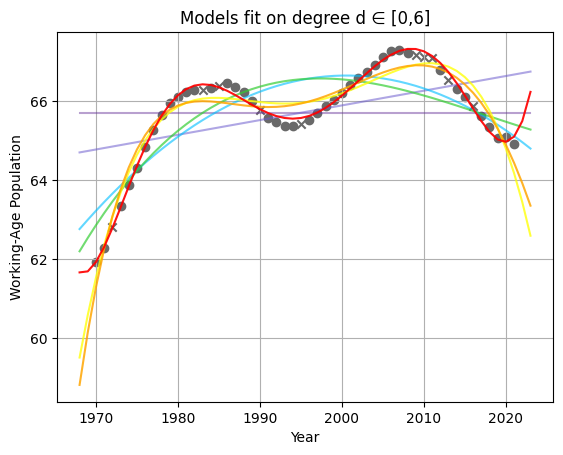

In [122]:

plt.scatter(X_train, y_train, color='dimgray')
plt.scatter(X_test, y_test, color='dimgray', marker='x')
years = np.array(list(range(1968, 2024)))
years_inp = years.reshape(-1,1)

colors = [
    'red',
    'orange',
    'yellow',
    'limegreen',
    'deepskyblue',
    'slateblue',
    'rebeccapurple'
][::-1]
for d in range(7):
    model = OutputScalingWrapper(
        Pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=d),
            StandardScaler(),
            LinearRegressor()
        )
    )
    model.fit(X_train, y_train)
    plt.plot(years, model.predict(years_inp), colors[d], label=f'Degree {d} curve', alpha=(d+6)/13)

plt.xlabel('Year')
plt.ylabel('Working-Age Population')
plt.title('Models fit on degree d ∈ [0,6]')
# plt.legend()
plt.grid()
plt.show()

### 7.1 - Varying degrees for test error

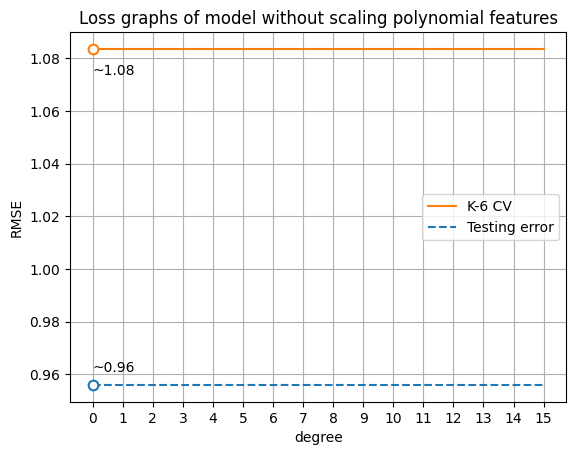

In [60]:
k = 6
max_d = 15

degree = list(range(max_d+1))
cv_err = list()
test_err = list()
train_err = list()
for d in degree:
    model = OutputScalingWrapper(
        Pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=d),
            # StandardScaler(),
            LinearRegressor()
        )
    )
    # model = Pipeline(
    #         StandardScaler(),
    #         PolynomialFeatures(degree=d),
    #         # StandardScaler(),
    #         LinearRegressor()
    #     )
    
    cv_err.append(
        cross_val_score(model, X_train, y_train, k)
    )
    
    model.fit(X_train, y_train)
    train_err.append(model.score(X_train, y_train))
    test_err.append(model.score(X_test, y_test))

plot_line(degree, cv_err, 'K-6 CV', 'C1', offset=(0.01, -0.01))
# plot_line(degree, test_err, 'Training error', 'C2', show_min=False)
plot_line(degree, test_err, 'Testing error', 'C0--', offset=(0.01, 0.005))

# plot_line(degree, train_err, 'Training error', 'C9', show_min=False)

plt.xticks(degree)
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.title(f'Loss graphs of model without scaling polynomial features')
plt.legend()
plt.grid()
plt.show()

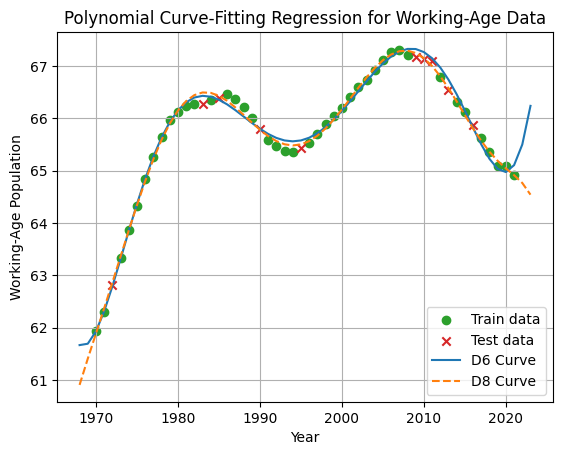

In [61]:
model6 = OutputScalingWrapper(
    Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=6),
        StandardScaler(),
        LinearRegressor()
    )
)
model8 = OutputScalingWrapper(
    Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=8),
        StandardScaler(),
        LinearRegressor()
    )
)
model6.fit(X_train, y_train)
model8.fit(X_train, y_train)
plt.scatter(X_train, y_train, color='C2', label='Train data')
plt.scatter(X_test, y_test, color='C3', label='Test data', marker='x')
years = np.array(list(range(1968, 2024)))
years_inp = years.reshape(-1,1)

plt.plot(years, model6.predict(years_inp), label='D6 Curve', color='C0')
plt.plot(years, model8.predict(years_inp), 'C1--', label='D8 Curve')

plt.xlabel('Year')
plt.ylabel('Working-Age Population')
plt.title('Polynomial Curve-Fitting Regression for Working-Age Data')
plt.legend()
plt.grid()
plt.show()

# m6w = [val[0] for val in model6.w] + [0,0]
# m8w = [val[0] for val in model8.w]
# print([round(abs(val1 - val2), 4) for val1, val2 in zip(m6w, m8w)])

### 7.2 - changes in architecture

In [62]:
# reg_term = 0
try:
    k = 6
    max_d = 12

    model = OutputScalingWrapper(
        Pipeline(
            PolynomialFeatures(degree=d),
            StandardScaler(),
            LinearRegressor()
        )
    )

    print(cross_val_score(model, X_train, y_train, k))


except Exception as e:
    print('error:',e)

0.506420968704648


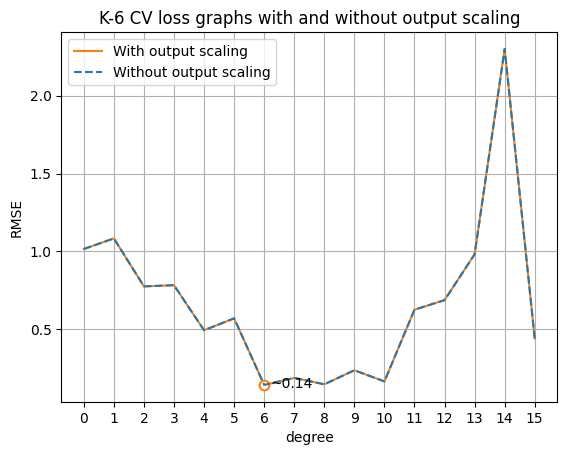

In [63]:
k = 6
max_d = 15

degree = list(range(max_d+1))
osw_err = list()
nosw_err = list()
for d in degree:
    osw_model = OutputScalingWrapper(
        Pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=d),
            StandardScaler(),
            LinearRegressor()
        )
    )
    nosw_model = Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=d),
        StandardScaler(),
        LinearRegressor()
    )
    
    osw_err.append(
        cross_val_score(osw_model, X_train, y_train, k)
    )
    nosw_err.append(
        cross_val_score(nosw_model, X_train, y_train, k)
    )
    
    model.fit(X_train, y_train)
    train_err.append(model.score(X_train, y_train))
    test_err.append(model.score(X_test, y_test))

plot_line(degree, osw_err, 'With output scaling', 'C1')
plot_line(degree, nosw_err, 'Without output scaling', 'C0--', show_min=False)
# plot_line(degree, train_err, 'Training error', 'C9', show_min=False)

plt.xticks(degree)
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.title(f'K-6 CV loss graphs with and without output scaling')
plt.legend()
plt.grid()
plt.show()

og w: [[1.50834206e-15]
 [4.79078579e-01]]
noscale w: [[0.47907858]]


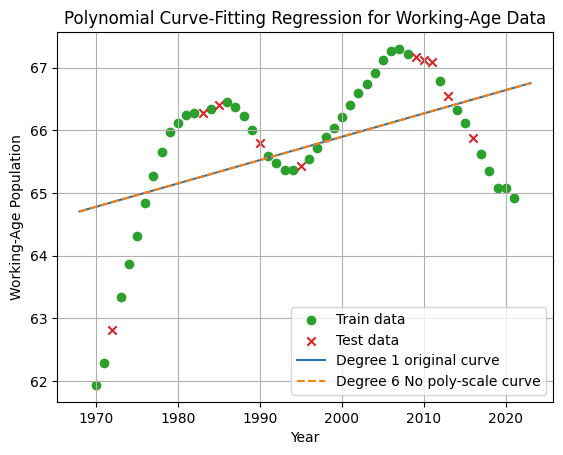

In [64]:
model_d1 = OutputScalingWrapper(
    Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=1),
        StandardScaler(),
        LinearRegressor()
    )
)
model_noscale = OutputScalingWrapper(
    Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=6),
        # StandardScaler(),
        LinearRegressor()
    )
)
model_d1.fit(X_train, y_train)
model_noscale.fit(X_train, y_train)

plt.scatter(X_train, y_train, color='C2', label='Train data')
plt.scatter(X_test, y_test, color='C3', label='Test data', marker='x')
years = np.array(list(range(1968, 2024)))
years_inp = years.reshape(-1,1)

plt.plot(years, model_noscale.predict(years_inp), 'C0', label='Degree 1 original curve')
plt.plot(years, model_noscale.predict(years_inp), 'C1--', label='Degree 6 No poly-scale curve')
print("og w:", model_d1.w)
print("noscale w:", model_noscale.w)

plt.xlabel('Year')
plt.ylabel('Working-Age Population')
plt.title('Polynomial Curve-Fitting Regression for Working-Age Data')
plt.legend()
plt.grid()
plt.show()


### 7.3 - larger dataset

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
corr
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


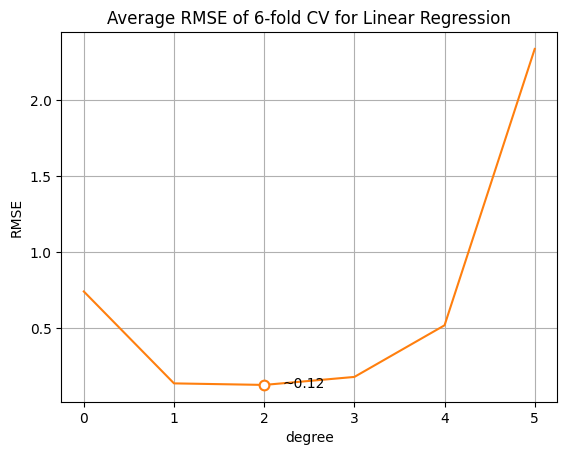

Training RMSE: 0.11548511057886553
Testing RMSE: 0.328877773475939
Relative Error: 184.7793727065328 %


In [65]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
print(data.feature_names)
print('corr')
print(np.corrcoef(data.data.T))

X_train, X_test, y_train, y_test = train_test_split(
                                        data.data[:, :3], data.data[:, 3], 
                                        shuffle=False
                                    )
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

k = 6
max_d = 5
d_opt = None

degree = list(range(max_d+1))
cv_err = list()
test_err = list()
for d in degree:
    # create model
    model = OutputScalingWrapper(
        Pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=d),
            StandardScaler(),
            LinearRegressor()
        )
    )
    
    # score model
    cv_err.append(
        cross_val_score(model, X_train, y_train, k)
    )
    model.fit(X_train, y_train)
    test_err.append(model.score(X_test, y_test))
    


# output results of cross validation
with open('../out/cv_errors_data.dat', 'w') as file:
    file.write('\n'.join(f'{d} {e}' for d, e in zip(degree, cv_err)))

d_opt = plot_line(degree, cv_err, 'cv err', 'C1')
# plot_line(degree, test_err, 'test err', 'C0', show_min=False)

plt.xticks(degree)
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.title(f'Average RMSE of 6-fold CV for Linear Regression')
# plt.legend()
plt.grid()
plt.show()

model = OutputScalingWrapper(
    Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=2),
        StandardScaler(),
        LinearRegressor()
    )
)
model.fit(X_train, y_train)
train_loss = model.score(X_train, y_train)
test_loss = model.score(X_test, y_test)
print('Training RMSE:',train_loss)
print('Testing RMSE:', test_loss)
print('Relative Error:', 100*abs(test_loss-train_loss)/train_loss,'%')


### 7.4 - ridge regression

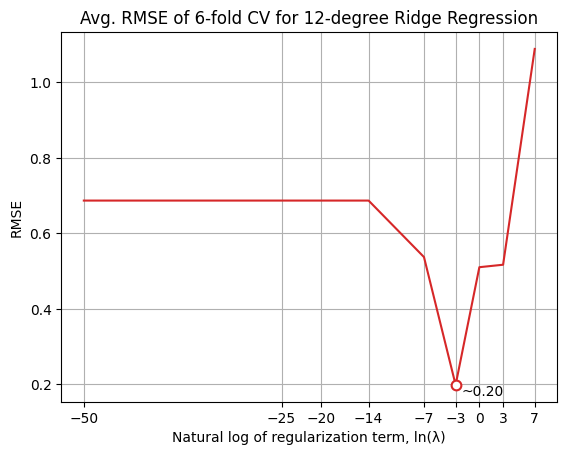

ln(λ*): -3
λ*: 0.049787068367863944


In [121]:
from math import exp, log, e
X_train, X_test, y_train, y_test = load_proj_data()

# cv6
reg = [0, exp(-25), exp(-20), exp(-14), exp(-7), exp(-3), 1,  exp(3), exp(7)]
ln_reg = [-50, -25, -20, -14, -7, -3, 0, 3, 7]
cv_err = list()
d = 12
for r in reg:
    # create model
    model = OutputScalingWrapper(
        Pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=d),
            StandardScaler(),
            RidgeRegressor(λ=r)
        )
    )
    # score model
    cv_err.append(
        cross_val_score(model, X_train, y_train, k)
    )
ln_reg_opt = plot_line(ln_reg, cv_err, 'cv err', 'C3', (0.7, -0.03))
# reg_opt = plot_line(reg, cv_err, 'cv err', 'C3')
plt.xticks(ln_reg)
# plt.xticks(reg)
plt.xlabel('Natural log of regularization term, ln(λ)')
plt.ylabel('RMSE')
plt.title(f'Avg. RMSE of 6-fold CV for 12-degree Ridge Regression')
plt.grid()
plt.show()
print('ln(λ*):',ln_reg_opt)
print('λ*:',exp(ln_reg_opt))
reg_opt = ln_reg_opt
reg_opt = exp(ln_reg_opt)



Training RMSE: 0.12758075931040205
Testing RMSE: 0.12866166689401426
Relative Error: 0.8472340104062043 %


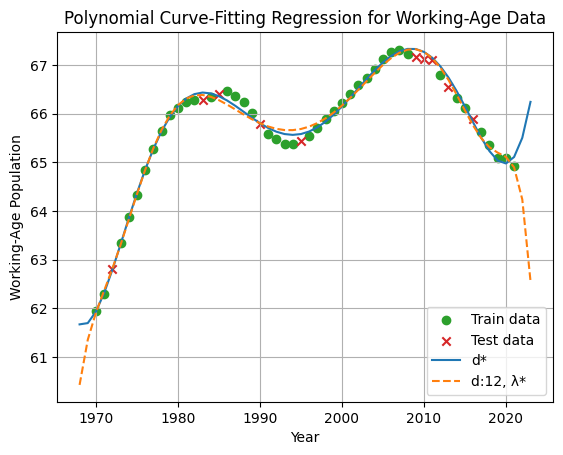

In [114]:
model_og = OutputScalingWrapper(
    Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=6),
        StandardScaler(),
        RidgeRegressor(λ=0)
    )
)
model = OutputScalingWrapper(
    Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=12),
        StandardScaler(),
        RidgeRegressor(λ=reg_opt)
    )
)
model_og.fit(X_train, y_train)
model.fit(X_train, y_train)
# print(model.w)
with open('../out/w_ridge.dat', 'w') as file:
    file.write('\n'.join(map(str, model.w.T[0])))
    
train_loss = model.score(X_train, y_train)
test_loss = model.score(X_test, y_test)
print('Training RMSE:',train_loss)
print('Testing RMSE:', test_loss)
print('Relative Error:', 100*abs(test_loss-train_loss)/train_loss,'%')

plt.scatter(X_train, y_train, color='C2', label='Train data')
plt.scatter(X_test, y_test, color='C3', label='Test data', marker='x')
years = np.array(list(range(1968, 2024)))
years_inp = years.reshape(-1,1)
plt.plot(years, model_og.predict(years_inp),'C0', label='d*')
plt.plot(years, model.predict(years_inp),'C1--', label='d:12, λ*')

plt.xlabel('Year')
plt.ylabel('Working-Age Population')
plt.title('Polynomial Curve-Fitting Regression for Working-Age Data')
plt.legend()
plt.grid()
plt.show()

### 8.2 - testing polynomial features implementation

In [67]:
from sklearn.preprocessing import PolynomialFeatures as SKPF
d = 4; x = np.array([[1,2,3,4,5,6]])
all((SKPF(degree=d).fit_transform(x) == PolynomialFeatures(degree=d).fit_transform(x))[0])


True